#  <font color=#8A0808><center><span style="border:1px solid black;"> -Computational Statistics Week 3- </center></font>
###  <font color=#045FB4><b>LE MEUR Vincent</b></font>

Exercice 6.7,7.1,7.2,7.12,7.24,8.4,9.1 et 9.2

## Exercice 6.7

Nous considérons la matrice $$\mathcal{P} =\begin{bmatrix}
0 & 0.4 & 0.6 & 0 & 0 \\
0.65 & 0 & 0.35 & 0 & 0 \\
0.32 & 0.68 & 0 & 0 & 0 \\
0 & 0 & 0 & 0.12 & 0.88 \\
0 & 0 & 0 & 0.56 & 0.44
\end{bmatrix}$$


Il s'agit d'une matrice de transition d'une chaîne de Markov avec 5 états : {1,2,3,4,5}
Etudions l'irréductibilité et l'apériodicité de la chaîne.

Cette matrice nous indique qu'on ne peut pas passer des états {1,2,3} aux états {4,5} (et inversement).
Elle n'est donc pas irréductible.


Etudions son apériodicité :

A partir de l'état {1} ou {2} ou {3}, le nombre d'étapes des différents lacets pour retourner à l'étape {1}( ou {2} ou {3}) sont 2,3 et 4. Le plus grand commun diviseur (PGCD) est donc 1.

Enfin, à partir des états {4} ou {5}, le nombre d'étapes des différents lacets pour retourner à l'étape {4} (ou {5}) sont 1, 2 et 3. Le PGCD est donc ici aussi de 1.

Nous avons traité tous les états donc on peut conclure que la chaîne est apériodique.

## Exercice 7.1

L'objet de cet exercice est de générer la moyenne d'une loi Gamma(4.3,6.2) par trois méthodes différentes. Nous allons comparer à la fin la convergence des trois méthodes

<b>a) On génère la moyenne à partir d'un algorithme Accept-Reject d'une loi candidate Gamma(4,6) </b>

On estime empiriquement la constante M de notre algorithme d'accept-reject :

In [1]:
A=rgamma(100000,4,6)
B=rgamma(100000,4.3,6.2)
M= sum(B)/sum(A)
M


[1] 1.042254

On prends alors M=1.1 pour la suite. On crée notre génèrateur à partir d'un algorithme Accept Reject



In [2]:
gamma4362 = function(){
    u=runif(1)*M
    y=rgamma(1,4,6)
    while (u>(dgamma(y,4.3,6.2)/dgamma(y,4,6))){
        u=runif(1)*M
        y=rgamma(1,4,6)
    }
    return(y)
    }

Et on génère notre échantillon simulé de taille n : 

In [3]:
rgamma4362 = function(n){
    A=rep(0,n)
    for (k in 1:n){
        A[k]=gamma4362()
    } 
    return(A)
}

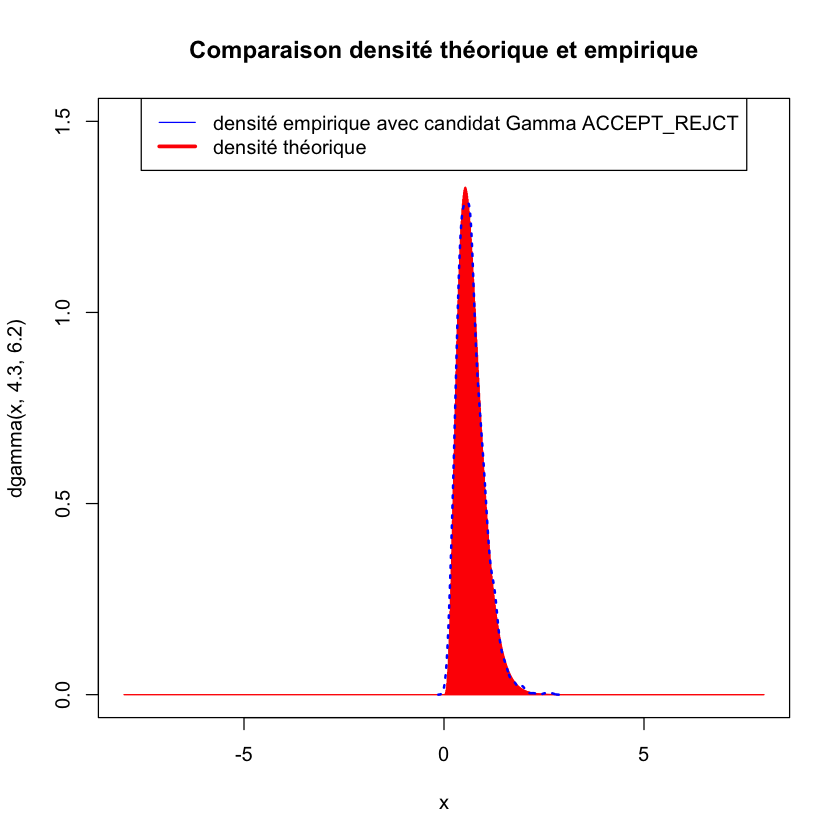

In [4]:
x=seq(from=-8,to=8,by=0.01)
plot(x,dgamma(x,4.3,6.2),type="h",col="red",main="Comparaison densité théorique et empirique",ylim=c(0,1.5))
lines(density(rgamma4362(length(x))),col="blue",lwd=2,lty=3)
legend("top", # la position sur le graphique
          c("densité empirique avec candidat Gamma ACCEPT_REJCT" ,"densité théorique"), # le texte pour chaque courbe
          col=c("blue", "red"), # La couleur de chaque courbe
          lwd=c(1,3,1), # L'épaisseur de chaque courbe
          lty=c(1,1,3) # Le type de trait de chaque courbe
      )

La moyenne est alors donnée par : 

In [5]:
N=10^4
mean(rgamma4362(N))

[1] 0.6828621

<b> b) On génère la moyenne à partir d'un algorithme Metropolis-Hastings d'une loi candidate Gamma(4,6) </b>

On génère notre chaîne de Markov à partir d'un alogirthme Metropolis-Hastings, puis on trace à nouveau les densité théorique et empirique :

In [6]:
N=10^4
X71b=rep(runif(1),N)    # initialisation de la chaine
for (i in 2:N){
    Y=rgamma(1,4,6)   # On utilise un candidat Gamma(4,6)
    rho=dgamma(Y,4.3,6.2)*dgamma(X71b[i-1],4,6)/(dgamma(X71b[i-1],4.3,6)*dgamma(Y,4,6))
    X71b[i]=X71b[i-1] + (Y-X71b[i-1])*(runif(1)<min(rho,1)) }

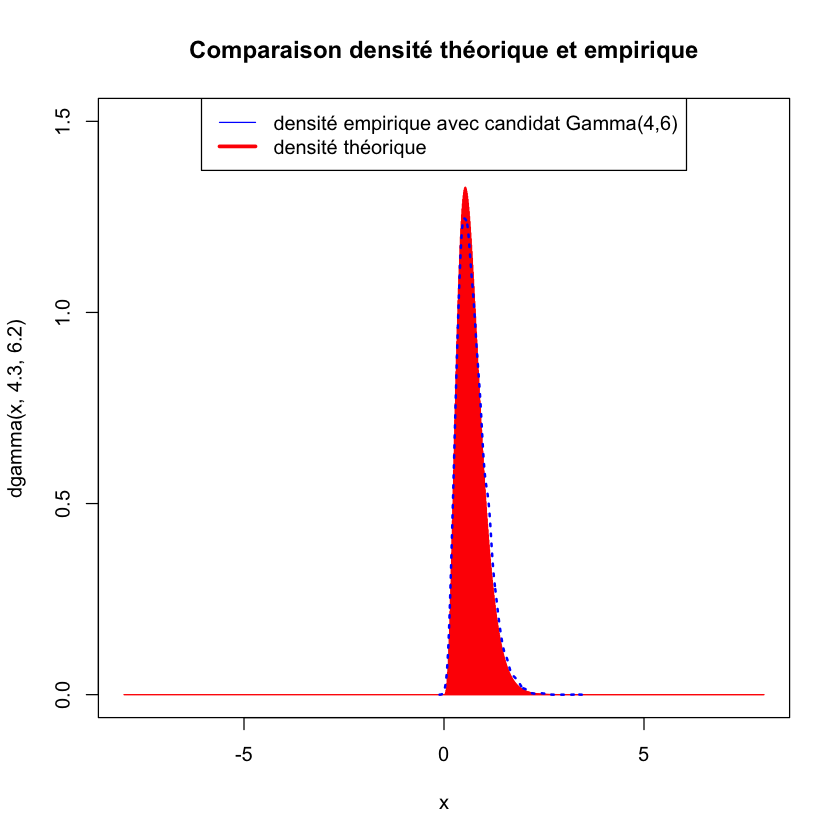

In [7]:
x=seq(from=-8,to=8,by=0.01)
plot(x,dgamma(x,4.3,6.2),type="h",col="red",main="Comparaison densité théorique et empirique",ylim=c(0,1.5))
lines(density(X71b),col="blue",lwd=2,lty=3)
legend("top", # la position sur le graphique
          c("densité empirique avec candidat Gamma(4,6)" ,"densité théorique"), # le texte pour chaque courbe
          col=c("blue", "red"), # La couleur de chaque courbe
          lwd=c(1,3,1), # L'épaisseur de chaque courbe
          lty=c(1,1,3) # Le type de trait de chaque courbe
      )

La moyenne est donnée par : 

In [8]:
mean(X71b)


[1] 0.7157447

<b> c) On génère la moyenne à partir d'un algorithme Metropolis-Hastings d'une loi candidate Gamma(5,6) </b>

On effectue la même démarche que précédemment en partant d'une loi $\Gamma(5,6)$ : 

In [9]:
N=10^4
X71c=rep(runif(1),N)    # initialisation de la chaine
for (i in 2:N){
    Y=rgamma(1,5,6)   # On utilise un candidat Gamma(5,6)
    rho=dgamma(Y,4.3,6.2)*dgamma(X71c[i-1],5,6)/(dgamma(X71c[i-1],4.3,6)*dgamma(Y,5,6))
    X71c[i]=X71c[i-1] + (Y-X71c[i-1])*(runif(1)<min(rho,1)) }

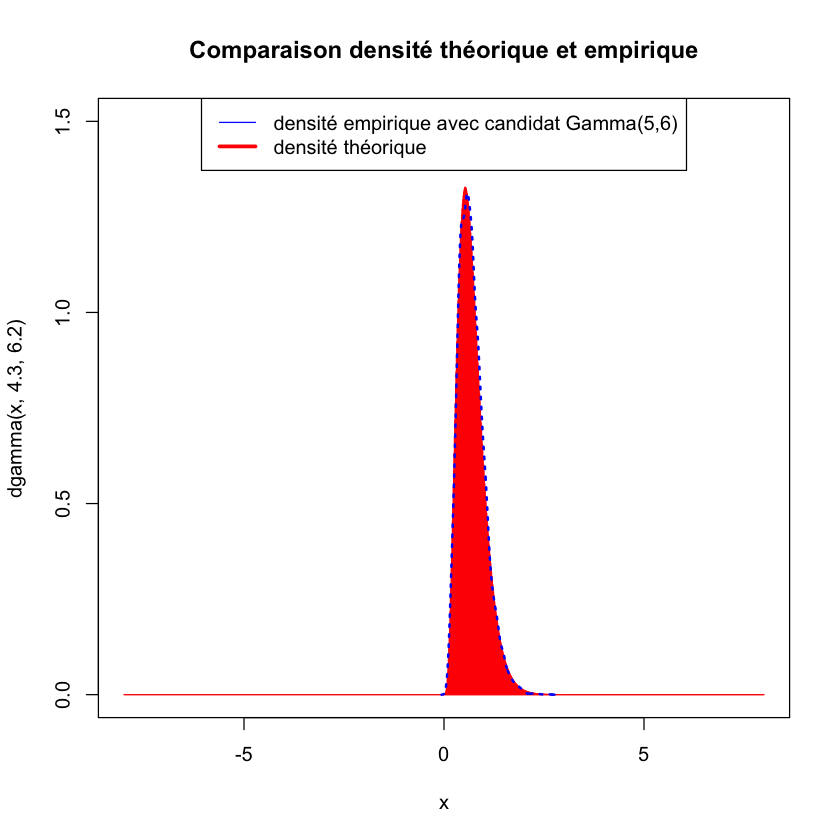

In [10]:
x=seq(from=-8,to=8,by=0.01)
plot(x,dgamma(x,4.3,6.2),type="h",col="red",main="Comparaison densité théorique et empirique",ylim=c(0,1.5))
lines(density(X71c),col="blue",lwd=2,lty=3)
legend("top", # la position sur le graphique
          c("densité empirique avec candidat Gamma(5,6)" ,"densité théorique"), # le texte pour chaque courbe
          col=c("blue", "red"), # La couleur de chaque courbe
          lwd=c(1,3,1), # L'épaisseur de chaque courbe
          lty=c(1,1,3) # Le type de trait de chaque courbe
      )

La moyenne est donnée par : 

In [11]:
mean(X71c)

[1] 0.697716

La vraie valeur est :

In [12]:
mean(rgamma(100000,4.3,6.2))

[1] 0.6946476

Nos trois valeurs semblent proches de la valeur réelle.

Observons la convergence de nos trois méthodes :

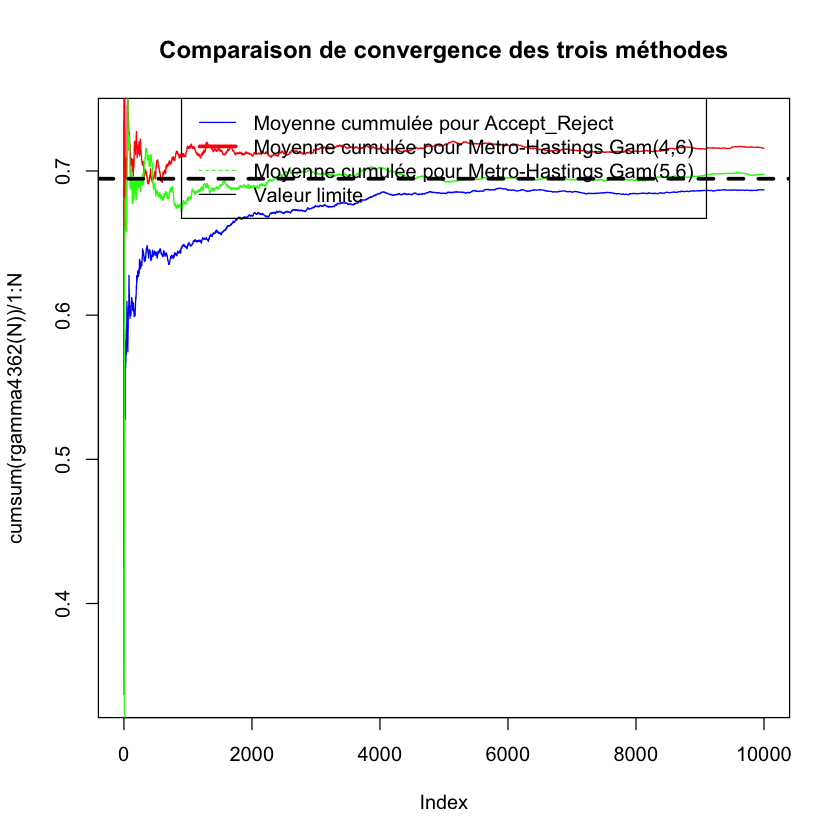

In [13]:
N=10^4
plot(cumsum(rgamma4362(N))/1:N,type="l",col="blue",main="Comparaison de convergence des trois méthodes")
lines(cumsum(X71b)/1:N,type="l",col="red")
lines(cumsum(X71c)/1:N,type="l",col="green")
abline(a=mean(rgamma(100000,4.3,6.2)),0,col="black",lw=3,lty=2)
legend("top", # la position sur le graphique
          c("Moyenne cummulée pour Accept_Reject" ,"Moyenne cumulée pour Metro-Hastings Gam(4,6)","Moyenne cumulée pour Metro-Hastings Gam(5,6)","Valeur limite"), # le texte pour chaque courbe
          col=c("blue", "red","green","black"), # La couleur de chaque courbe
          lwd=c(1,3,1), # L'épaisseur de chaque courbe
          lty=c(1,1,3) # Le type de trait de chaque courbe
      )

En conclusion nos trois méthodes convergent globalement vers la "vraie" valeur. Seulement il semble que la convergence de l'Accept_Reject soit plus rapide et moins biaisée. Il semble également que le candidat $\Gamma(5,6)$ offre une meilleur convergence pour l'algorithme de Metropolis-Hastings

## Exercice 7.2

Codons notre propre fonction de densité de student à $\nu$ degrés de liberté

In [14]:
fstud = function(x,nu){
    return ((gamma((nu+1)/2)/(gamma(nu/2)))*(1/sqrt(nu*pi))*(1+(x^2/nu))^(-(nu+1)/2))
    
}

In [15]:
x=seq(from=-10,to=10,by=0.001)

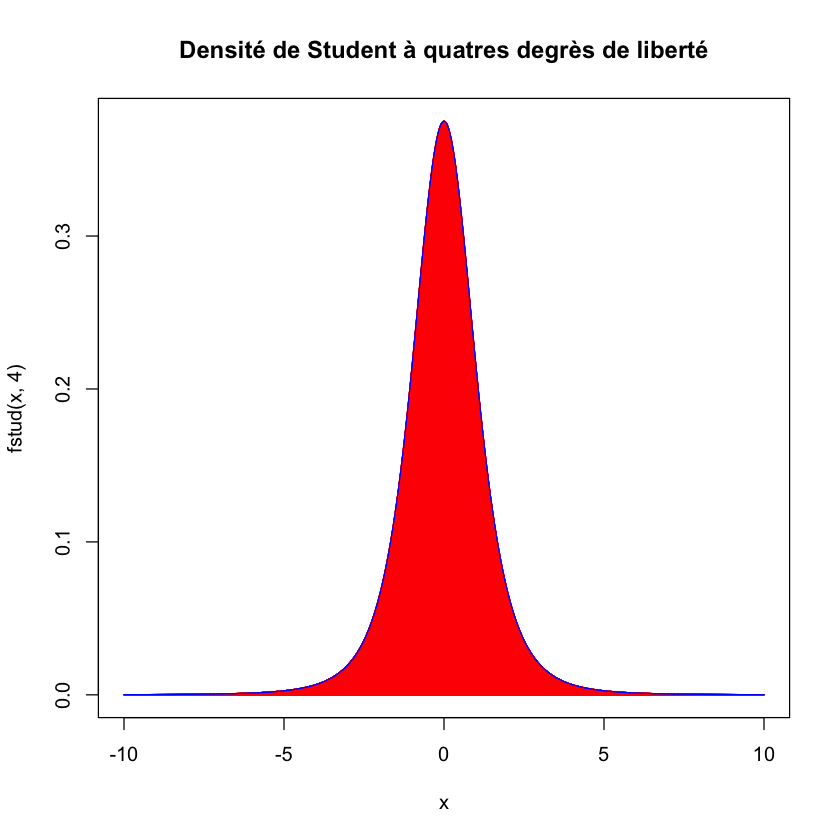

In [16]:
plot(x,fstud(x,4),col="red",type="h",main="Densité de Student à quatres degrès de liberté")
lines(x,dt(x,4),col="blue",type="l")

On cherche à calculer la moyenne d'une telle loi en utilisant la propriété de convergence issue de l'algo de Metropolis-Hastings. La vrai valeur étant ici 0.

On approxime donc la moyenne $\int_{-\infty}^{+\infty} {xf(x)dx}$ par $\dfrac{1}{T}\sum_{t=1}^{T}{X^{t}}$ où $X^{t}$ correspond au $t^{ième}$ noeud de la chaîne de Markov associé

<b> a) Utilisation de $\mathcal{N}(0,1)$ comme densité candidate  dans un algorithme de Metropolis Hastings </b>

On génère notre chaîne de Markov  :

In [10]:
N=10^5
Xa=rep(runif(1),N)    # initialisation de la chaine
for (i in 2:N){
    Y=rnorm(1,0,1)   # On utilise un candidat normal
    rho=dt(Y,4)*dnorm(Xa[i-1])/(dt(Xa[i-1],4)*dnorm(Y))
    Xa[i]=Xa[i-1] + (Y-Xa[i-1])*(runif(1)<min(rho,1)) }

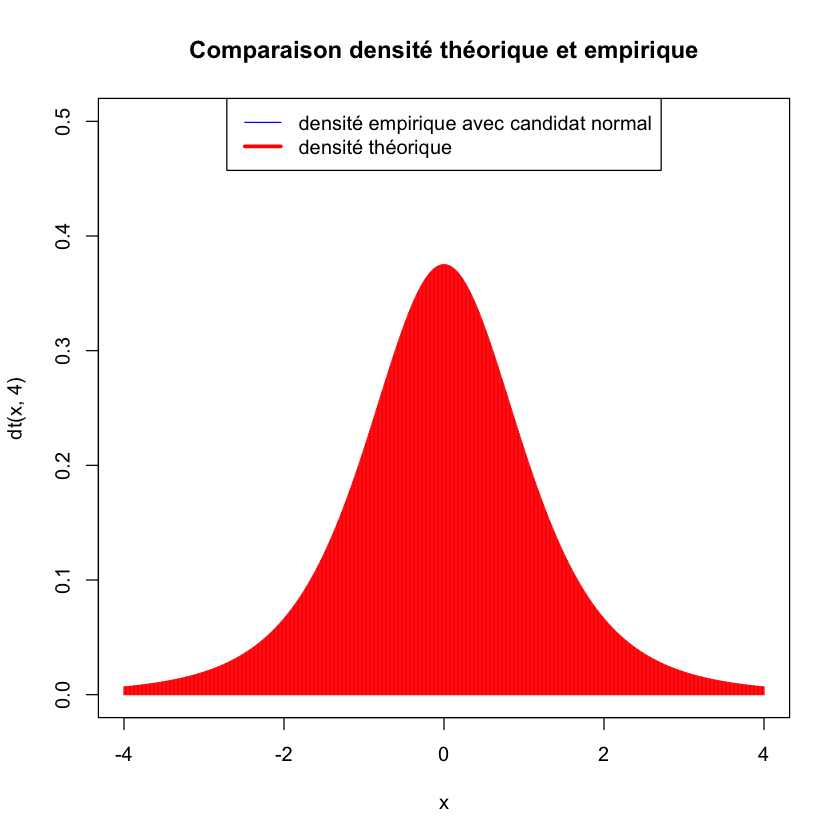

In [4]:
x=seq(from=-4,to=4,by=0.01)
plot(x,dt(x,4),type="h",col="red",main="Comparaison densité théorique et empirique",ylim=c(0,0.5))
lines(density(Xa),col="blue",lwd=2,lty=3)
legend("top", # la position sur le graphique
          c("densité empirique avec candidat normal" ,"densité théorique"), # le texte pour chaque courbe
          col=c("blue", "red"), # La couleur de chaque courbe
          lwd=c(1,3,1), # L'épaisseur de chaque courbe
          lty=c(1,1,3) # Le type de trait de chaque courbe
      )

Nous savons que la moyenne dans ce cas doit valoir 0. Notre méthode nous donne la valeur :

In [11]:
sum(Xa)/N
mean(Xa)

[1] -0.008350365

[1] -0.008350365

<b> b) Utilisation d'une loi de Student t à 2 degrès de libertés comme densité candidate  dans un algorithme de Metropolis Hastings </b>

On génère notre chaîne de Markov  :

In [14]:
N=10^5
Xb=rep(runif(1),N)    # initialisation de la chaine
for (i in 2:N){
    Y=rt(1,2)   # On utilise un candidat student à 2 degrès de liberté
    rho=dt(Y,4)*dt(Xb[i-1],2)/(dt(Xb[i-1],4)*dt(Y,2))
    Xb[i]=Xb[i-1] + (Y-Xb[i-1])*(runif(1)<min(rho,1)) }

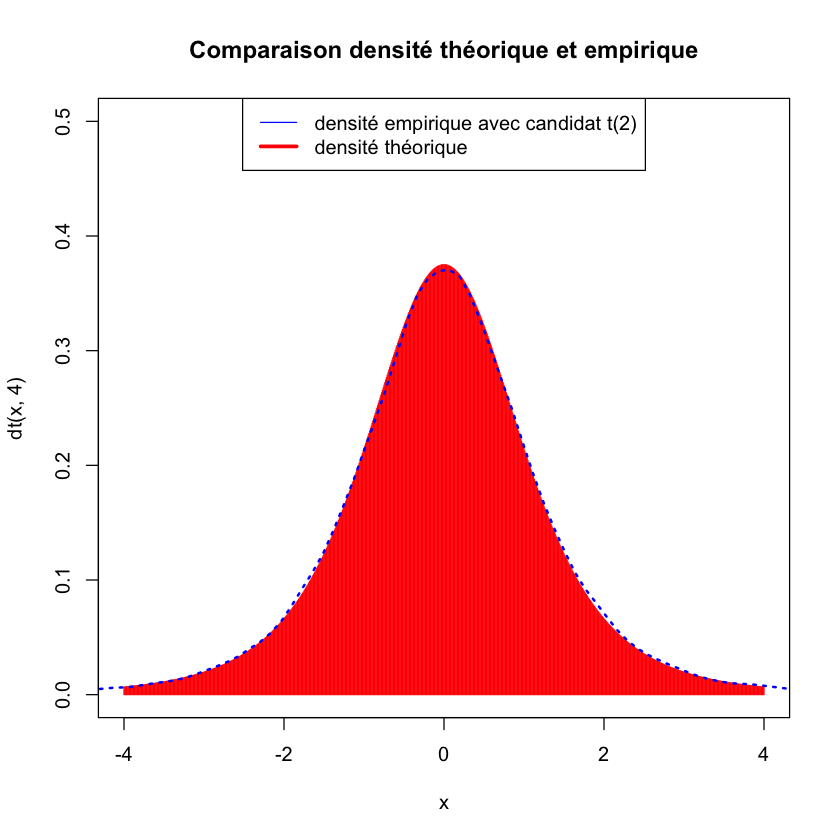

In [21]:
x=seq(from=-4,to=4,by=0.01)
plot(x,dt(x,4),type="h",col="red",main="Comparaison densité théorique et empirique",ylim=c(0,0.5))
lines(density(Xb),col="blue",lwd=2,lty=3)
legend("top", # la position sur le graphique
          c("densité empirique avec candidat t(2)" ,"densité théorique"), # le texte pour chaque courbe
          col=c("blue", "red"), # La couleur de chaque courbe
          lwd=c(1,3,1), # L'épaisseur de chaque courbe
          lty=c(1,1,3) # Le type de trait de chaque courbe
      )

Nous avons cette fois pour la moyene  :

In [16]:
mean(Xb)

[1] -0.0001793822

Ce qui est bien plus proche de la vraie valeur

Comparons à présent les vitesses de convergence des deux méthodes :

In [17]:
help(abline)

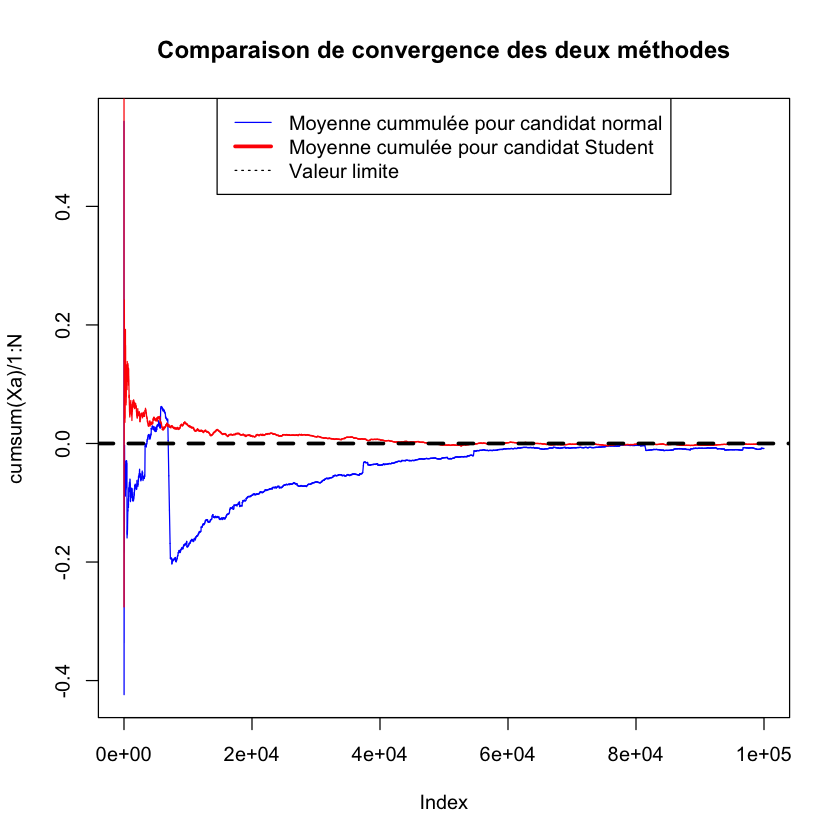

In [19]:
plot(cumsum(Xa)/1:N,type="l",col="blue",main="Comparaison de convergence des deux méthodes")
lines(cumsum(Xb)/1:N,type="l",col="red")
abline(a=0,0,col="black",lw=3,lty=2)
legend("top", # la position sur le graphique
          c("Moyenne cummulée pour candidat normal" ,"Moyenne cumulée pour candidat Student","Valeur limite"), # le texte pour chaque courbe
          col=c("blue", "red","black"), # La couleur de chaque courbe
          lwd=c(1,3,1), # L'épaisseur de chaque courbe
          lty=c(1,1,3) # Le type de trait de chaque courbe
      )


Le candidat Student a une convergence plus rapide et avec un biais qui semble réduit

## Exercice 7.12

Dans cet exercice nous allons générer une loi normale $\mathcal{N}(0,1)$ à partir de lois uniformes sur $[-\delta,\delta]$ en utilisant un algorithme de Metropolis_Hastings. 

<b> a)  On étudie l'influence de $\delta$ sur le taux de convergence et sur le taux d'acceptation

Le taux de convergence est représenté ici par la différence des quantiles à 90% et 10% pour chaque échantillon généré. On forme donc la fonction conv_rate qui va à partir de delta générer un échantillon issue d'un algorithme de Metropolis-Hastings à partir de lois uniforme sur $[-\delta,\delta]$ puis calculer les différences interquantilles (à 90% et 10%)

In [2]:
conv_rate= function(delta){
    N=10^4
    X=rep(runif(1),N)    # initialisation de la chaine
      #On initialise un compteur pour le taux d'acceptation
    for (i in 2:N){
        Y=runif(1,min=-delta,max=delta)   # On utilise un candidat uniforme sur [-delta,delta]
        rho=dnorm(Y,mean=0,sd=1)/(dnorm(X[i-1],mean=0,sd=1))
        X[i]=X[i-1] + (Y-X[i-1])*(runif(1)<min(rho,1))
        }
    q10=quantile(X,c(0.1)) # calcul du quantile à 10%
    q90=quantile(X,c(0.9)) # calcul du quantile à 90%
    return(q90[[1]]-q10[[1]])
    
    
}

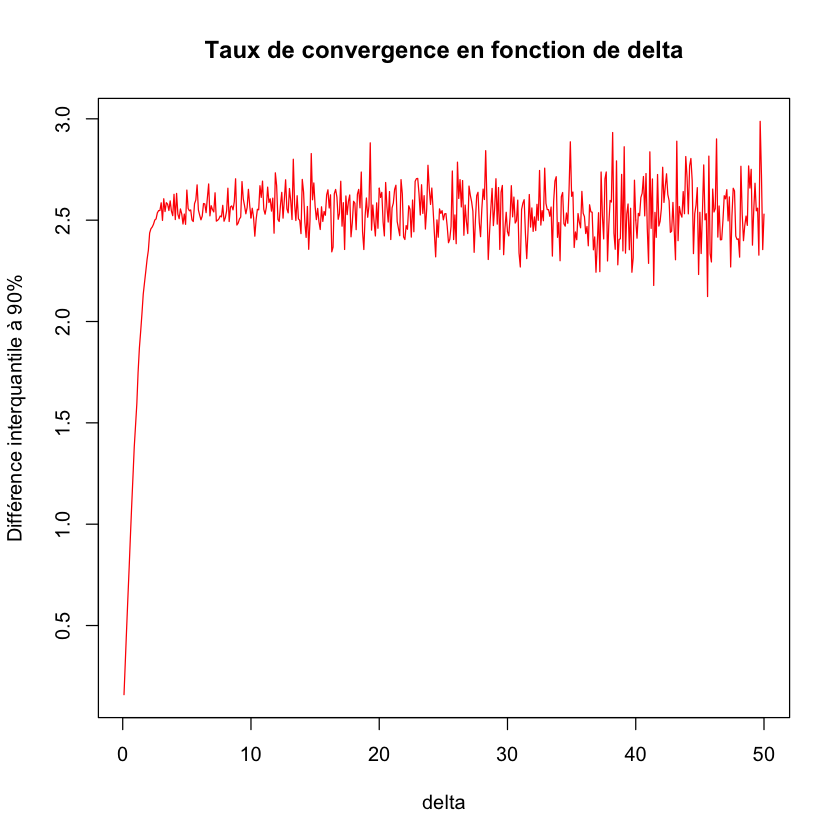

In [3]:
x=seq(from=0.1,to=50,by=0.1)

A<-c()
for (k in 1:length(x) ){
    A[k]=conv_rate(x[k])
}
plot(x,A,type="l",col="red",main="Taux de convergence en fonction de delta",xlab="delta",ylab="Différence interquantile à 90%")

Le taux de convergence a tendance à augmenter avec $\delta$

On peut comparer ces valeurs au taux de convergence d'une loi $\mathcal{N}(0,1)$ qui est donnée par :

In [26]:
b= quantile(rnorm(N,0,1),c(0.9))
a= quantile(rnorm(N,0,1),c(0.1))
c=b[[1]]-a[[1]]
c

[1] 2.568712

En conclusion notre taux de convergence oscille autour de la "vraie" valeur. Seulement l'amplitude de ces oscillations augmente avec $\delta$ ce qui est préjudicable.

On étudie à présent le taux d'acceptation, qui représente le quotient $\dfrac{Nacept}{Nsim}$ avec Nacept le nombre de fois où l'algorithme de Metropolis-Hastings a accepté la proposition et Nsim le nombre total d'itérations

Pour cela on mets en place la fonction accpt_rate qui à partir d'un delta donnée va générer un échantillon issue d'un algorithme de Metropolis-Hastings à partir de lois uniforme sur $[-\delta,\delta]$ et d'en calculer le taux d'acceptation.

In [21]:
accpt_rate= function(delta){
    N=10^4
    X=rep(runif(1),N)    # initialisation de la chaine
    cpt=0  #On initialise un compteur pour le taux d'acceptation
    for (i in 2:N){
        Y=runif(1,min=-delta,max=delta)   # On utilise un candidat uniforme sur [-delta,delta]
        rho=dnorm(Y,mean=0,sd=1)/(dnorm(X[i-1],mean=0,sd=1))
        X[i]=X[i-1] + (Y-X[i-1])*(runif(1)<rho)
        if (runif(1)<rho){cpt<-cpt+1 # Mise en place du compteur
        }}
    return(cpt/N) # retourne le taux d'acceptation
    
    
}

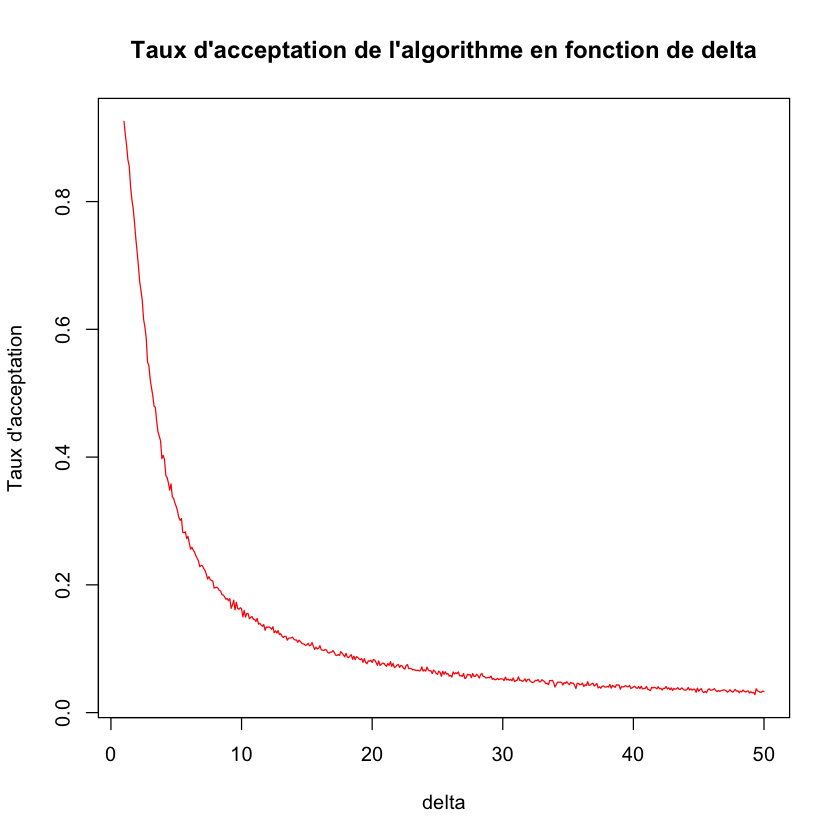

In [23]:
x=seq(from=1,to=50,by=0.1)

A<-c()
for (k in 1:length(x) ){
    A[k]=accpt_rate(x[k])
}
plot(x,A,type="l",col="red",main="Taux d'acceptation de l'algorithme en fonction de delta",xlab="delta",ylab="Taux d'acceptation")

On constate que ce taux d'acceptation chutte rapidement quand $\delta$ augmente. Cela vient du fait que la probabilité rho diminue quand delta augmente.

<b> b) Déterminons la valeur de $\delta$ qui minimise la variance de la moyenne empirique </b>

Tout d'abbord la variance empirique de la moyenne  est donnée par : $v=\dfrac{1}{n-1}\sum_{j=1}^{n}{[X^{j}-\widehat{\mu}]^2}$ avec $\widehat{\mu}$ la moyenne estimée empiriquement : $\widehat{\mu}=\dfrac{1}{n}\sum_{j=1}^{n}{X^{j}}$

On va donc chercher pour n fixé, à minimiser cette quantité. Créons tout d'abbord notre fonction var_delta qui va générer la variance à partir de $\delta$ :

In [93]:
var_delta = function(delta){
    N=10^4
    X=rep(runif(1),N)    # initialisation de la chaine
   
    for (i in 2:N){
        Y=runif(1,min=-delta,max=delta)   # On utilise un candidat uniforme sur [-delta,delta]
        rho=dnorm(Y,mean=0,sd=1)/(dnorm(X[i-1],mean=0,sd=1))
        X[i]=X[i-1] + (Y-X[i-1])*(runif(1)<rho)
        }
    mu=(1/N)*sum(X)  # On calcule la moyenne empirique
    Z=(X-mu)^2
    v=(1/(N-1))*sum(Z) # On en déduit la variance empirique
    return(v)
    
    
}

Le tracé ci-dessous des différentes valeurs de variance en fonction de delta ne nous permet pas de conclure de manière précise.

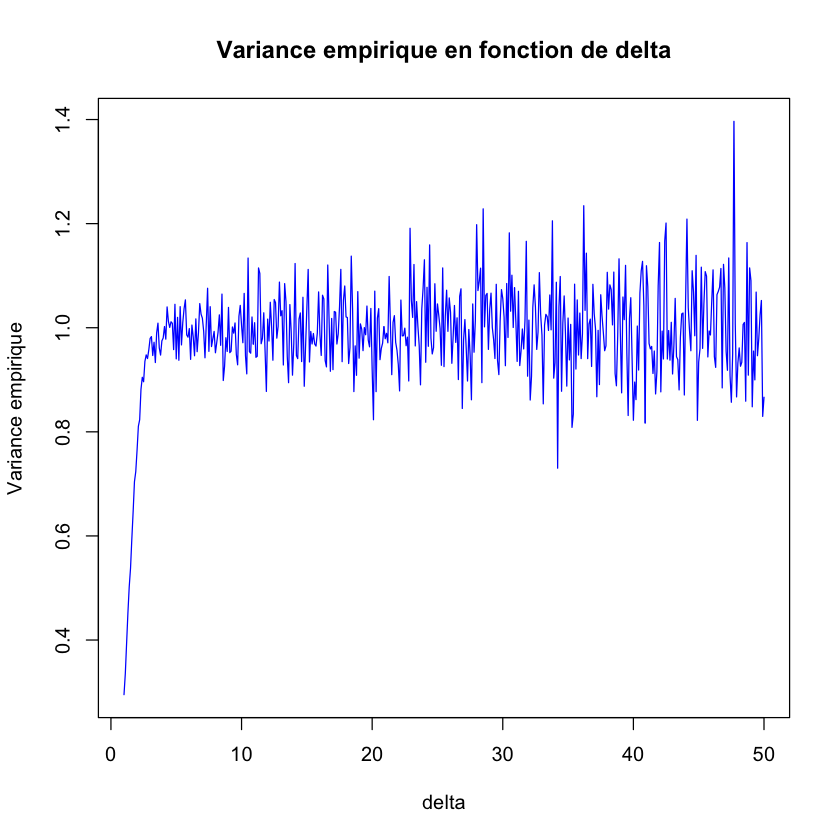

In [95]:
delta=seq(from=1,to=50,by=0.1)
cpt=0
A<-c()

    for (k in 1:length(delta) ){
        A[k]=var_delta(delta[k])
        }
    
plot(delta,A,type="l",col="blue",main="Variance empirique en fonction de delta",xlab="delta",ylab="Variance empirique")

Nous allons utiliser une exploration stochastique entre 0 et 50 :

In [31]:
recherche_sto = function(f,U){
    temp<-c()
    k=1
    repeat {
    if (k==length(U)) break
    temp[k]=f(U[k])
    k<-k+1
    }
    result1=min(temp) #On cherche le minimum de f
    rang=which(temp==result1) #Pour obtenir la valeur de notre échantillon uniforme minimisant f
    return(U[rang]) # La fonction retourne la valeur qui minimise f
    
    
}

In [32]:
Udelta = runif(10000,min=5,max=50) # On commence à 5 pour être dans le comportement asymptotique de la variance

In [33]:
recherche_sto(var_delta,Udelta)

[1] 45.45839

Cette valeur semble coincider avec un minima local du graph mais non à un minimum global. De plus les valeurs sont très volatiles à chaque exécution. Cela vient de notre technique d'estimation qui "n'accroche" pas nécessairement les extrema globaux

## Exercice 7.24

Ici, on cherche à implémenter un algorithme de Metropolis-Hastings pour générer une loi normale $\mathcal{N}(0,1)$ à partir de densités  uniformes $q(.|x)$ de forme $U[-x-\delta, -x+\delta]$. On cherche à étudier l'influence de $\delta$ sur la corrélation (négative) des $X^{t}$.

Tout d'abord formons notre Chaîne de Markov en fonction de $\delta$ grâce à la fonction Markov_chain724 :

In [6]:
Markovchain724= function(delta){
    N=10^4
    X=rep(runif(1),N)    # initialisation de la chaine
    for (i in 2:N){
        Y=runif(1,min=-X[i-1]-delta,max=-X[i-1]+delta)   # On utilise un candidat uniforme sur [-x-delta,-x+delta]
        rho=dnorm(Y,mean=0,sd=1)/(dnorm(X[i-1],mean=0,sd=1))
        X[i]=X[i-1] + (Y-X[i-1])*(runif(1)<min(rho,1))
        }

    return(X)
    
    
}

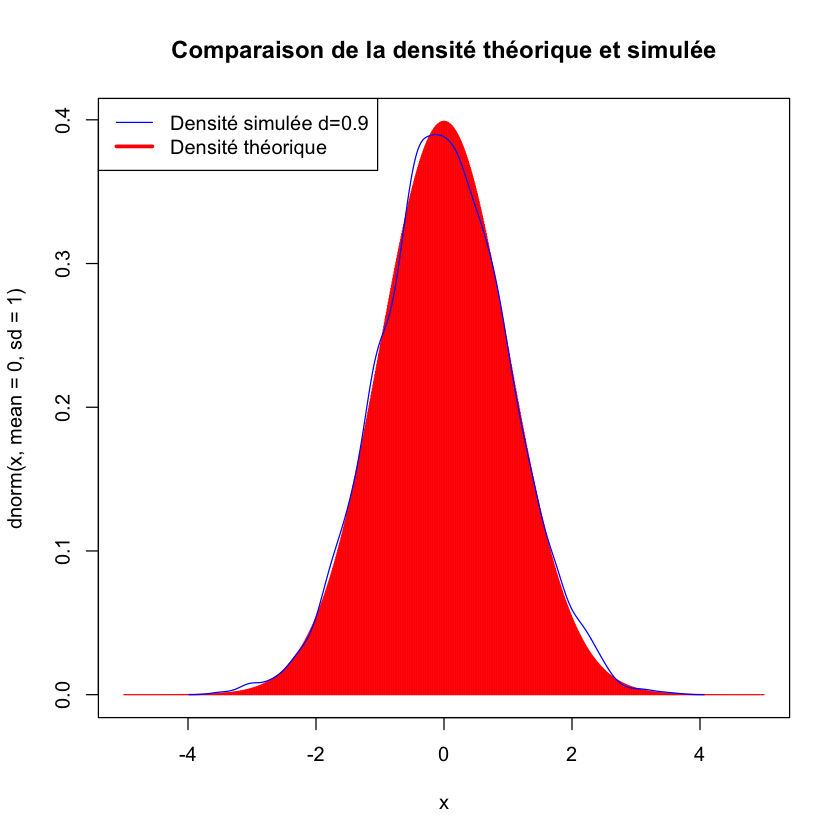

In [35]:
x=seq(from=-5,to=5,by=0.01)
plot(x,dnorm(x,mean=0,sd=1),type="h",col="red",main="Comparaison de la densité théorique et simulée")
lines(density(Markov_chain724(0.9)),col="blue")
legend("topleft", # la position sur le graphique
          c("Densité simulée d=0.9" ,"Densité théorique"), # le texte pour chaque courbe
          col=c("blue", "red"), # La couleur de chaque courbe
          lwd=c(1,3,1), # L'épaisseur de chaque courbe
          lty=c(1,1,3) # Le type de trait de chaque courbe
      )


Nous allons à présent observer la corrélation existant entre les $X^{t}$ en utilisant des ACF. Voici deux ACF prises pour $\delta=0.3$ et $\delta=5$

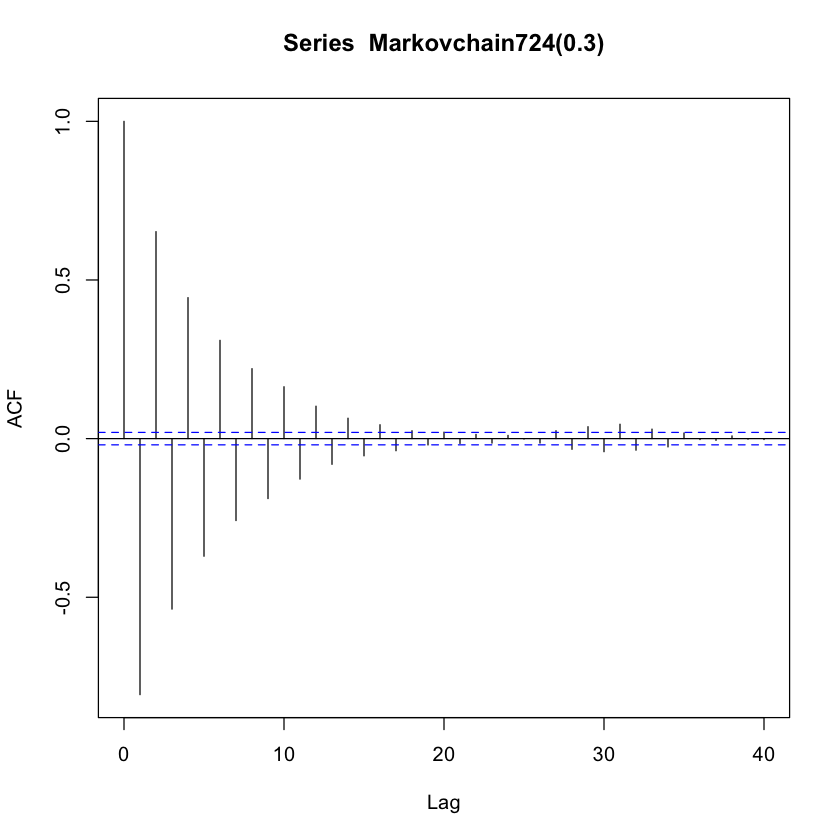

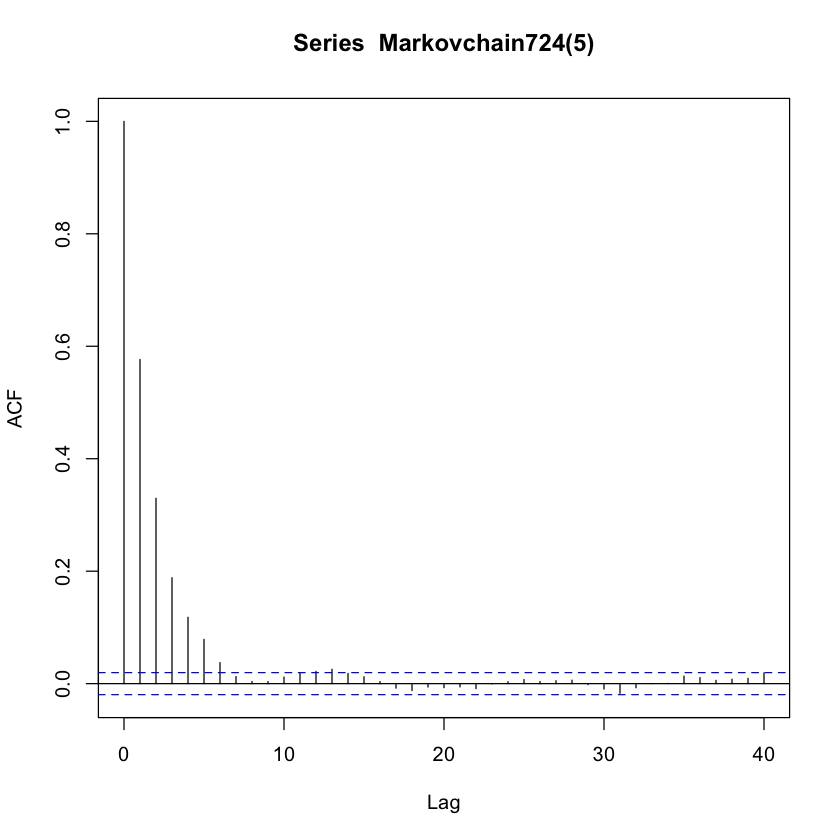

In [7]:
acf(Markovchain724(0.3))
    
acf(Markovchain724(5))

On constate pour la première ACF une corrélation négative entre les coefficients alors qu'elle est positive pour l'autre. Cela vient du fait que notre fonction Markovchain724 initialise la chaîne de Markov pour x sur [0,1]. Si $\delta >>1$ alors le passage à l'étape d'après utilisant une loi uniforme sur [-x-delta,-x+delta] ne modifie pas l'intervalle (-x et x sont alors déjà dans le même intervalle) d'où l'absence de corrélation négative.

In [9]:
correl = function(delta){
    X=Markov_chain724(delta) # On génère notre chaîne de Markov
    Y=acf(X,plot=FALSE)[[1]][2]  # On récupère le 2ième coefficient de l'ACF
    return(Y)
}

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): invalid a=, b= specification


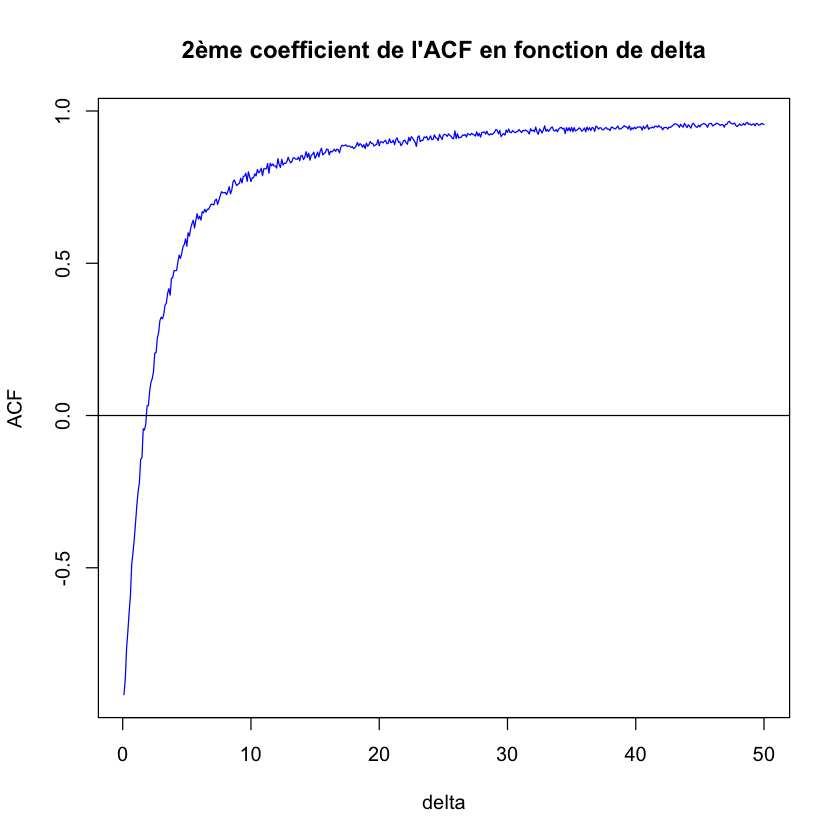

In [21]:
delta=seq(from=0.1,to=50,by=0.1)

B<-c()
for (k in 1:length(delta) ){
    B[k]=correl(delta[k])
}
plot(delta,B,type="l",col="blue",main="2ème coefficient de l'ACF en fonction de delta",xlab="delta",ylab="ACF")

In [26]:
correl(1.79)

[1] -0.03418509

In [38]:
#acf(Markov_chain724(0.3))
#X= acf(Markov_chain724(1.6))[[1]][2]
correl(100)
#Markov_chain724(1.5)[1]
#acf(Markov_chain724(3))
#acf(Markov_chain724(30))

[1] 0.9748989

In [1]:
#acf(Markov_chain(2))

# Exercice  8.4 

Dans cet exercice, on considère une densité $f(x) \propto \exp^{-x^{d}} $ avec $d<1$ et on cherche à mettre en place un échantillonneur par tranches et évaluer sa performance pour $d \in \{0.1,0.25,0.4\}$

Tout d'abord créons notre fonction $f$ notée ici $fd$ :

In [71]:
fd = function (x,d){
    return(exp(-(x^d)))
}

Nous allons, pour chaque valeur de $d$, générer des échantillons  issus d'un échantillonneur de GIBS avec la fonction sampler84 suivante :

In [72]:
sampler84 = function(d,Nsim) {
x=rep(1,Nsim) #initialisation de la chaîne
u=rep(0,Nsim) #initialisation de la chaîne
for (j in 2:Nsim){
    u[j]=runif(1,min=0,max=(0.5)*fd(x[j-1],d))
    x[j]=runif(1,min=0,max=(log(2*u[j]))^2) }
    return(x)
    }

Traçons les densités correspondantes :

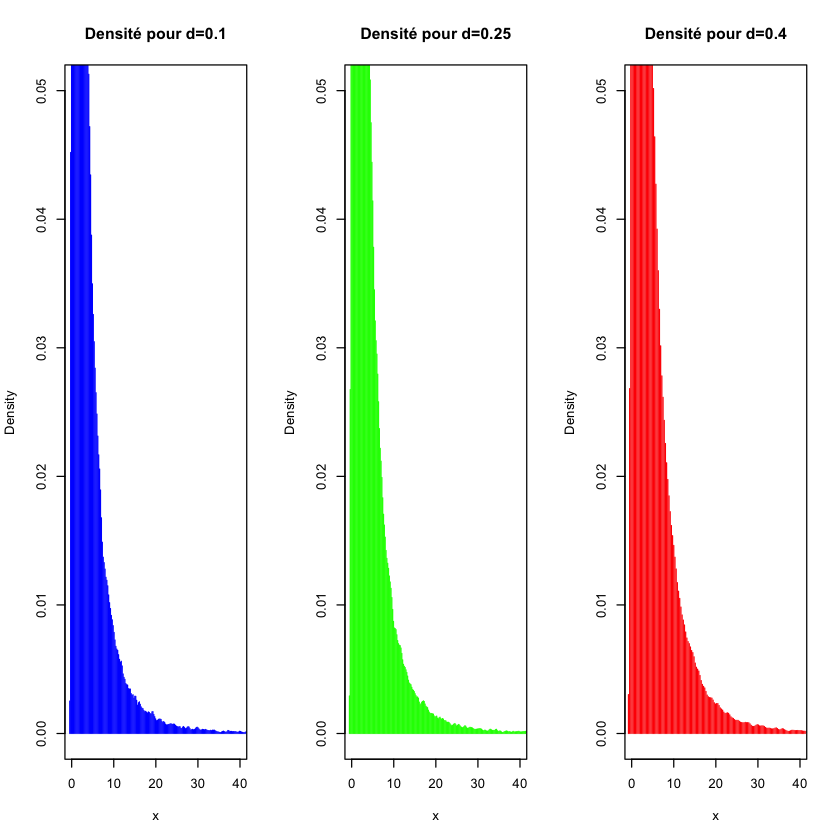

In [81]:
par(mfcol=c(1,3))
plot(density(sampler84(0.1,Nsim)),type="h",col="blue",xlim=c(0,40),ylim=c(0,0.05),main="Densité pour d=0.1",xlab="x")
plot(density(sampler84(0.25,Nsim)),type="h",col="green",xlim=c(0,40),ylim=c(0,0.05),main="Densité pour d=0.25",xlab="x")
plot(density(sampler84(0.4,Nsim)),type="h",col="red",xlim=c(0,40),ylim=c(0,0.05),main="Densité pour d=0.4",xlab="x")

Nous allons évaluer la performance de l'algorithme pour chaque valeur de d. Pour cela nous allons créer la fonction plotsample84 qui va pour une valeur de $d$ fixé tracer le maximum, le minimum et la moyenne sur 100 simulations de la moyenne cumulée de chaque série.

In [92]:
plotsampler84 = function(d,titre){

simulations = 100
iterations = 10000
nb_iterations = 1:iterations
y1= sampler84(d, iterations * simulations)
mat_y = matrix(y1,nrow = simulations,ncol = iterations)
cummean_y = t(apply(mat_y, 1, cumsum) / nb_iterations)
  min_y  = apply(cummean_y, 2, min)
  max_y  = apply(cummean_y, 2, max)
  mean_y = apply(cummean_y, 2, mean)
plot(nb_iterations, max_y, type = "l", col = "orange",ylim=c(0,10) ,
       main = titre, , 
       xlab = "itérations", ylab = "Envelope pour 100 simulations")
  lines(nb_iterations, min_y, col = "orange")
  lines(nb_iterations, mean_y, col = "blue")
  abline(a = mean(sampler84(d,iterations)), b =0 , col = "red", lw = 3, lty = 2)
  legend("topright", legend = c("Enveloppe de la moyenne cumulée sur 100 simulations", "Moyenne sur 100 simulations", "Valeur limite"),
         lwd = c(1, 1, 3), lty = c(1,1,2), col = c("orange", "blue", "red"))
}


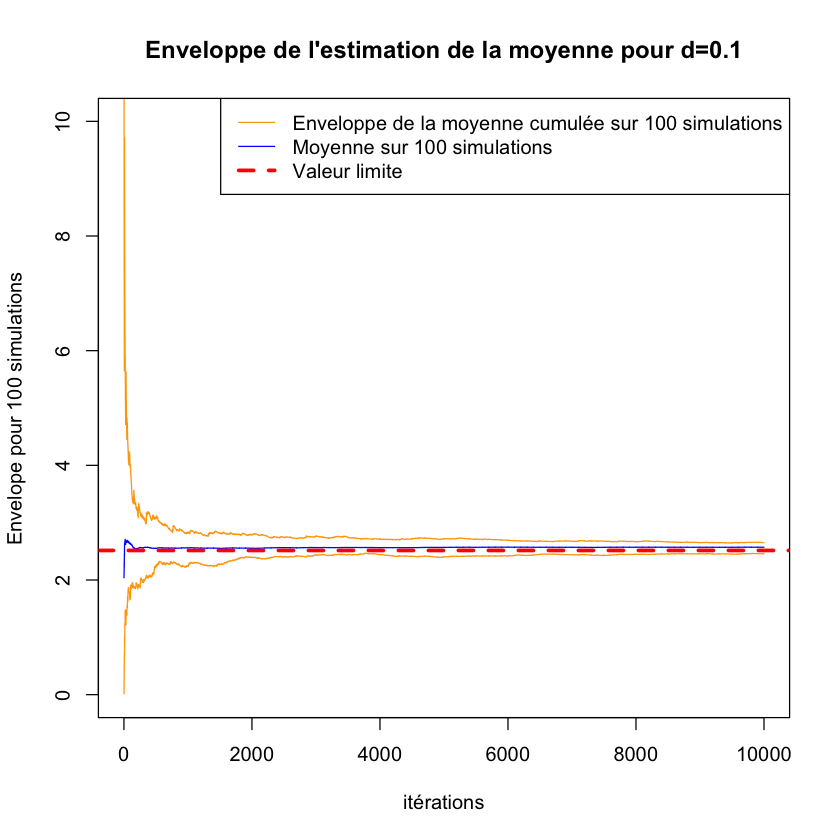

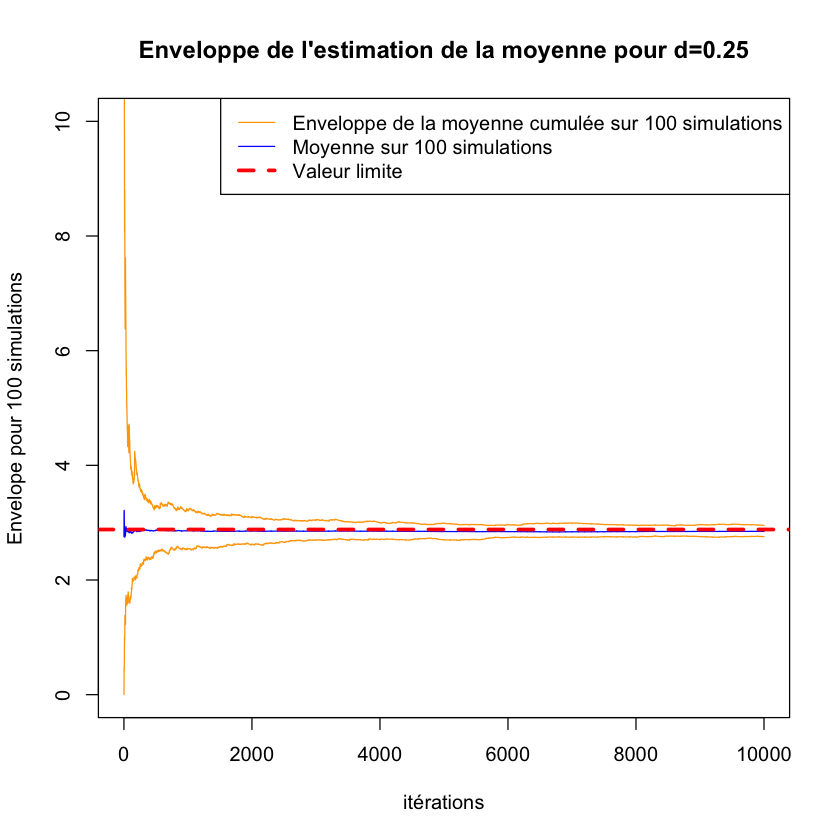

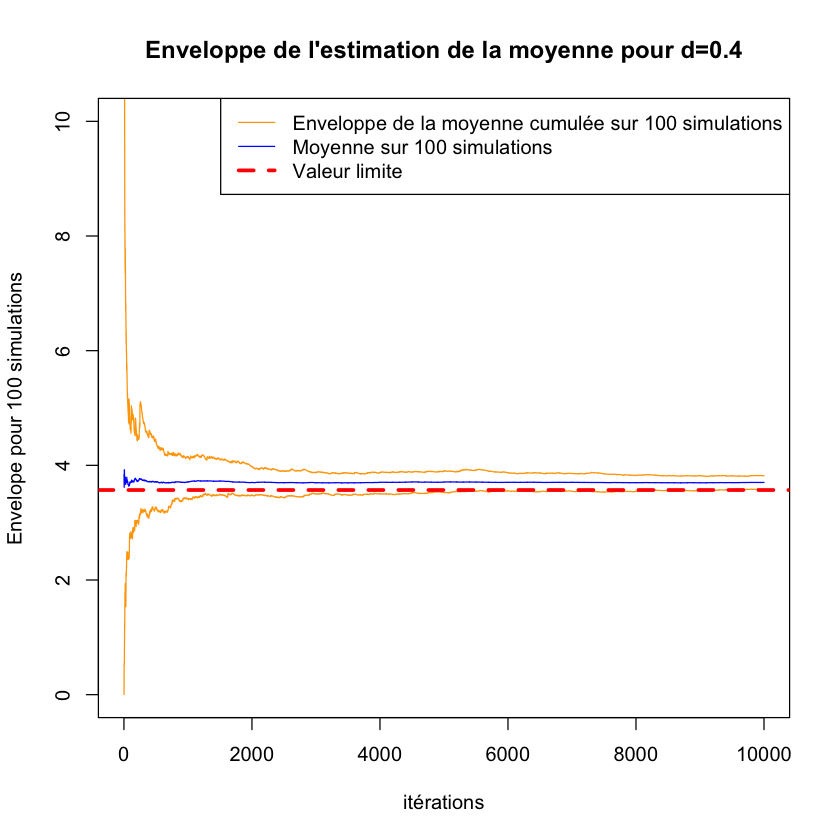

In [91]:
plotsampler84(0.1,"Enveloppe de l'estimation de la moyenne pour d=0.1")
plotsampler84(0.25,"Enveloppe de l'estimation de la moyenne pour d=0.25")
plotsampler84(0.4,"Enveloppe de l'estimation de la moyenne pour d=0.4")

On constate que la convergence de notre algorithme semble à peu près uniforme selon les différentes valeurs de d.

## Exercice 9.1

On considère l'échantilloneur de Gibbs suivant : 

![A33](CaptureA33.png)

<b> a) Montrons que les séquences $(X_i)$ , $(Y_i)$ et $(X_{i},Y_{i})$ sont des chaînes de Markov. </b>

Dans cet algorithme :$$   \\
Y_t \thicksim f_{Y|X}(.|x_{t-1}) \\
X_{t+1} \thicksim f_{X|Y}(.|y_{t})$$

Ainsi à chaque $t$, $Y_t$ et $X_t$ ne dépendent que de $Y_{t-1}$ et $X_{t-1}$. 
Nous avons donc  la même chose pour le couple $(X^{t},Y^{t})$ qui ne dépend que de $(X^{t-1},Y^{t-1})$ et non $X_{t-2}$,$Y_{t-2}$,$X_{t-3}$,$Y_{t-3}$....

Ainsi $(X_i)$ , $(Y_i)$ et $(X_{i},Y_{i})$ sont bien des chaînes de Markov.

<b> b) Montrons que $f_{X}(.)$ et $f_{Y}(.)$ sont les densitées invariantes de $X$ et $Y$ </b>

On considère le noyau de transition de Xt : 
$$K(x,x^{*})=\int_{y}{f_{Y|X}(y|x)f_{X|Y}(x^{*}|y)dy}$$

Et on calcule alors la quantité :
$$\int_{x}{K(x,x^{*})f_{X}(x)dx}$$

$$ \begin{aligned}
& \int_{x}{K(x,x^{*})f_{X}(x)dx} = \int_{x}\int_{y}{f_{Y|X}(y|x)f_{X|Y}(x^{*}|y)f_{X}(x)dxdy} \\
&= \int_{y}{f_{X|Y}(x^{*}|y)dy}\int_{x}{f_{Y|X}(y|x)f_{X}(x)dx} \\
&=\int_{y}{f_{X|Y}(x^{*}|y)}\int_{x}{f_{X,Y}(x,y)dxdy} \\
&=\int_{y}{f_{X,Y}(x^{*},y)dy}=f_{X}(x^{*})
\end{aligned} 
$$

Ainsi $f_{X}(.)$ est bien la densité invariante de $X_{t}$

Une démonstration analogue permet de montrer que $f_{Y}(.)$ est bien la densité invariante de $Y_{t}$

## Exercice 9.2

L'objet de cet exercice est de générer $(X,Y)$ une loi normale bivariée de moyenne $0$ de variance $1$ et de corrélation $\rho$ à partir d'un échantillonneur de Gibbs. On étudie en suite la variable $Z=X^2+Y^2$ et on cherche à déterminer $P(Z>2)$

On génère tout d'abord (X,Y) avec les fonction sampler92X et sampler92Y :

In [120]:
sampler92X = function(rho,Nsim){
X=rep(0,Nsim)
Y=rep(0,Nsim)    
for (t in 2:Nsim){
  X[t]=rnorm(1,rho*Y[t-1],1-(rho*rho))
  Y[t]=rnorm(1,rho*X[t],1-(rho*rho))
   
}
return(X)}

sampler92Y = function(rho,Nsim){
X=rep(0,Nsim)
Y=rep(0,Nsim)    
for (t in 2:Nsim){
  X[t]=rnorm(1,rho*Y[t-1],1-(rho*rho))
  Y[t]=rnorm(1,rho*X[t],1-(rho*rho))
   
}
return(Y)}

On obtient les tracés suivant pour les densités obtenues (la densité théorique étant superposée en noir) : 

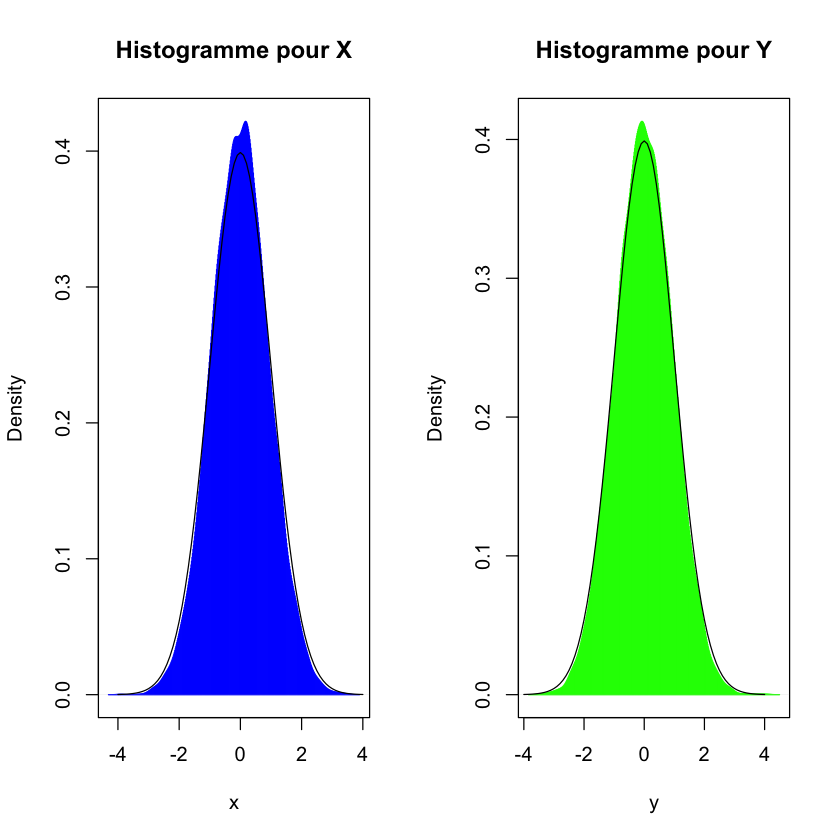

In [133]:
x=seq(from=-4,to=4,by=0.1)
par(mfcol=c(1,2))
plot(density(sampler92X(0.3,Nsim)),type="h",col="blue",main="Histogramme pour X",xlab="x")
lines(x,dnorm(x))
plot(density(sampler92Y(0.3,Nsim)),type="h",col="green",main="Histogramme pour Y",xlab="y")
lines(x,dnorm(x))


On étudie à présent la variable $Z=X^2+Y^2$ pour laquelle on trace la densité : 

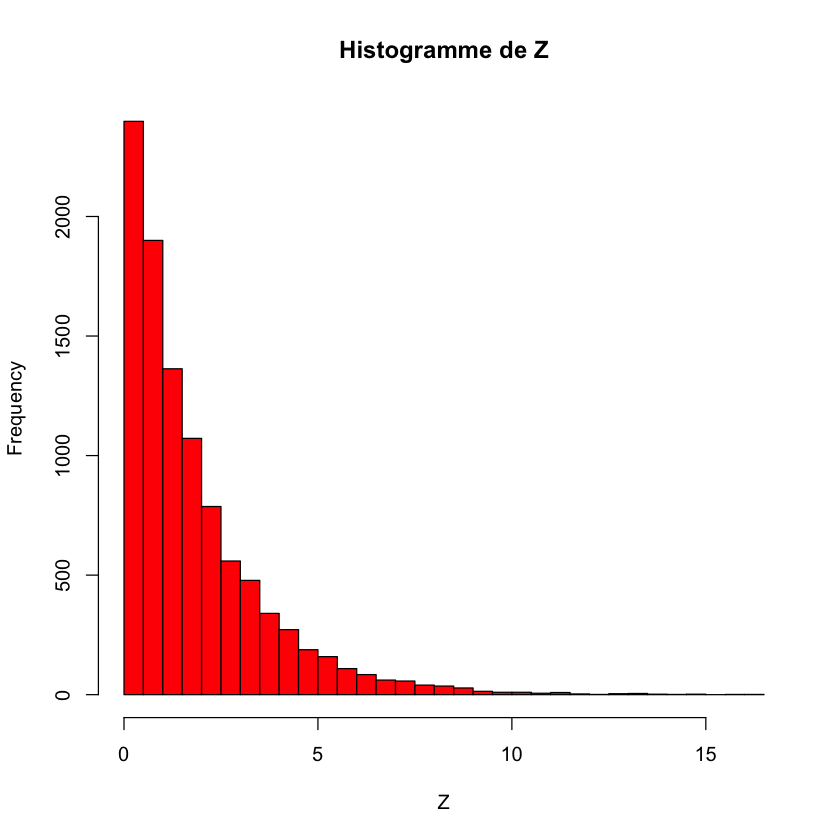

In [139]:
Z=(sampler92X(0.3,Nsim))^2+(sampler92Y(0.3,Nsim))^2
hist(Z,col= "red",breaks = 50,main="Histogramme de Z")

On cherche à présent à estimer $P(Z>2)$  :

Nous pouvons estimer empiriquement cette probabilité en calculant le quotient  $\dfrac{Card[Z[i] >2]}{Card[Z[i]]}$. On moyenne sous 100 ittérations pour obtenir : 

In [144]:
Az <-c()
for (k in 1:100){
Z=(sampler92X(0.3,Nsim))^2+(sampler92Y(0.3,Nsim))^2
Z2=Z[Z>2]
temp = length(Z2)/length(Z)
Az[k]=temp   
}
mean(Az)

[1] 0.332419